<a href="https://colab.research.google.com/github/JinnnnyHong/Study/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 8-2 산점도

In [ ]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

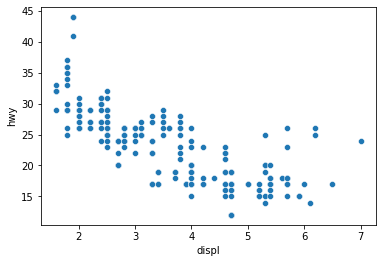

In [ ]:
#x축은 displ, y축은 hwy를 나타낸 산점도 만들기
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

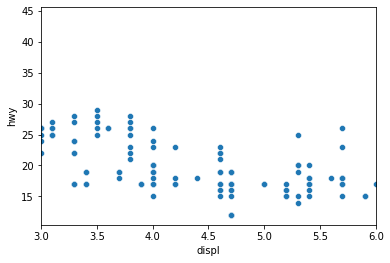

In [ ]:
# x축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3,6))

[(10.0, 30.0), (3.0, 6.0)]

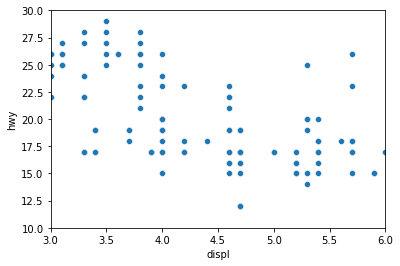

In [ ]:
#x축 3~6, y축 범위 10~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
.set(xlim = (3,6), ylim = (10, 30))

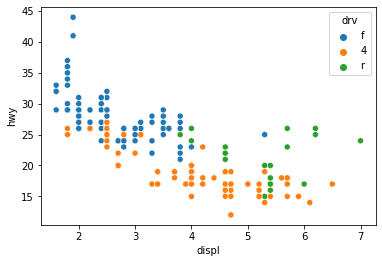

In [ ]:
#drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

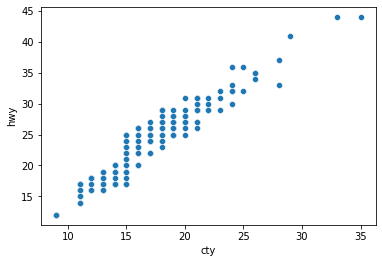

In [ ]:
#실습
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

In [ ]:
mid = pd.read_csv('midwest.csv')

[(0.0, 10000.0), (0.0, 500000.0)]

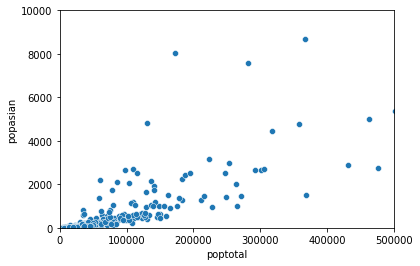

In [ ]:
sns.scatterplot(data = mid, x = 'poptotal', y = 'popasian')\
.set(xlim = (0, 500000), ylim = (0, 10000))

#8-3. 막대그래프

In [ ]:
#집단별 평균표 만들기
df_mpg = mpg.groupby('drv')\
.agg(mean_hwy = ('hwy','mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [ ]:
#위의 그래프는 drv가 인덱스로 바뀜, 그래프를 만드려면 변수에 담겨있어야하기 때문에 원래대로 유지하는 작업
df_mpg = mpg.groupby('drv', as_index = False)\
.agg(mean_hwy = ('hwy','mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


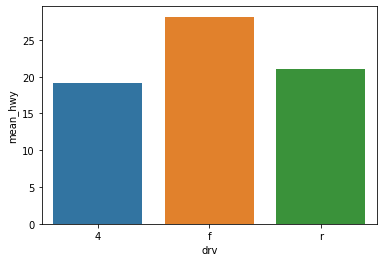

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

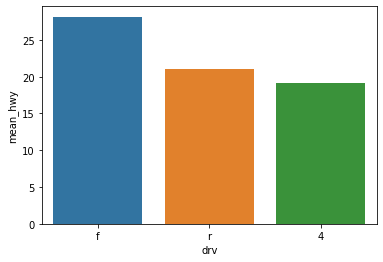

In [ ]:
# 크기순으로 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending= False)
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [ ]:
#빈도 막대 그래프 만들기
df_mpg = mpg.groupby('drv', as_index = False)\
.agg(n = ('hwy','count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


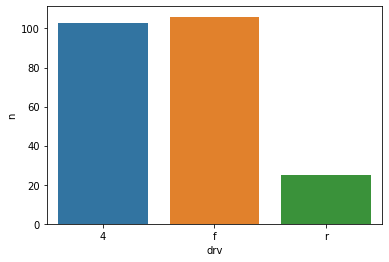

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

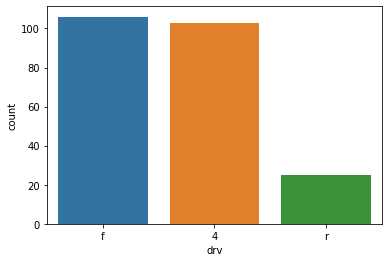

In [ ]:
#sns.countplot으로 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

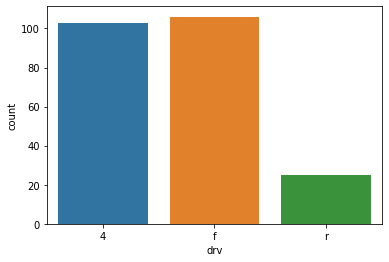

In [ ]:
#막대 정렬하기
sns.countplot(data = mpg, x = 'drv', order = ['4','f','r'])

In [ ]:
#drv빈도수가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

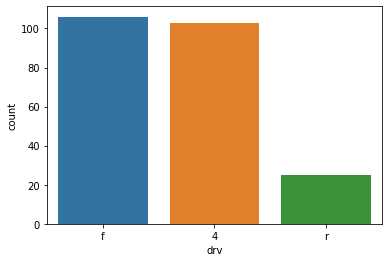

In [ ]:
sns.countplot(data = mpg, x = 'drv', order =mpg['drv'].value_counts().index)

In [ ]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
df = mpg.query('category == "suv"')\
.groupby(['manufacturer'], as_index = False)\
.agg(mean_cty = ('cty','mean'))\
.sort_values('mean_cty', ascending = False)\
.head(5)
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


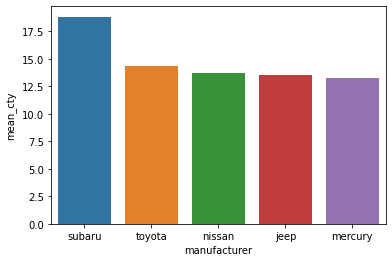

In [ ]:
sns.barplot(data = df, x = 'manufacturer', y = 'mean_cty')

In [ ]:
df2 = mpg.groupby(['category'], as_index = False)\
.agg(count_category = ('category', 'count'))\
.sort_values('count_category', ascending = False)
df2

,category,count_category
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


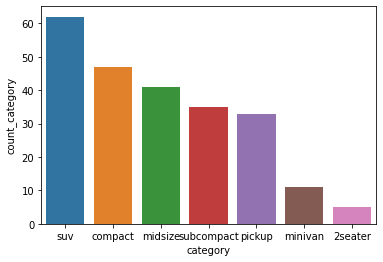

In [ ]:
sns.barplot(data = df2, x = 'category', y = 'count_category')

# 8-4. 선그래프

In [ ]:
#시계열 그래프 만들기
eco = pd.read_csv('economics.csv')
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


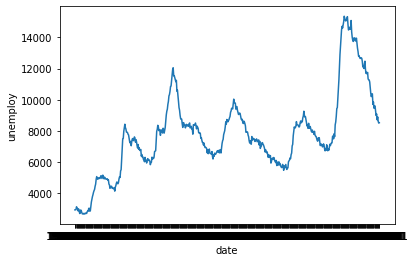

In [ ]:
sns.lineplot(data = eco, x = 'date', y = 'unemploy')

In [ ]:
#날짜 시간 타입 변수 만들기
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
#연추출
eco['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [ ]:
#월추출
eco['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [ ]:
#일추출
eco['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [ ]:
#연도 변수 만들기
eco['year'] = eco['date2'].dt.year
eco.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


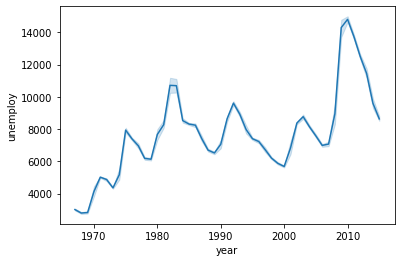

In [ ]:
#x축에 연도 표시
sns.lineplot(data = eco, x = 'year', y = 'unemploy')

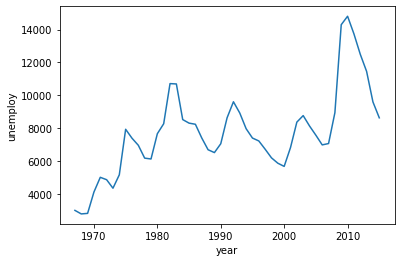

In [ ]:
#신뢰구간 제거
sns.lineplot(data = eco, x = 'year', y = 'unemploy', ci = None)

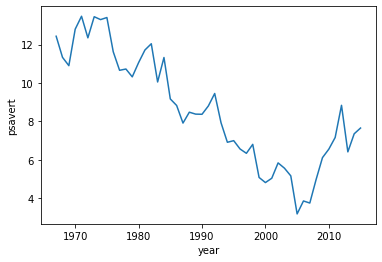

In [ ]:
sns.lineplot(data = eco, x = 'year', y = 'psavert', ci = None)

In [ ]:
eco['month'] = eco['date2'].dt.month
eco.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967,7
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967,8
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967,9
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967,10
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967,11


In [ ]:
eco2 = eco.query('year == 2014')
eco2

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014,1
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014,2
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014,3
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014,4
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014,5
563,2014-06-01,11817.0,318464.152,7.4,13.8,9460,2014-06-01,2014,6
564,2014-07-01,11860.5,318662.368,7.5,13.1,9608,2014-07-01,2014,7
565,2014-08-01,11944.3,318893.786,7.2,12.9,9599,2014-08-01,2014,8
566,2014-09-01,11957.4,319125.296,7.4,13.4,9262,2014-09-01,2014,9
567,2014-10-01,12023.0,319353.734,7.2,13.6,8990,2014-10-01,2014,10


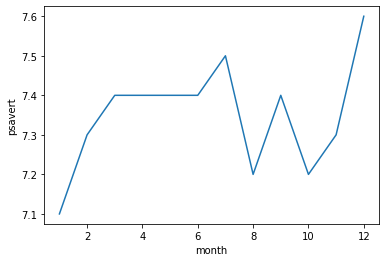

In [ ]:
sns.lineplot(data = eco2, x = 'month', y = 'psavert', ci = None)

# 8-5. 상자그림

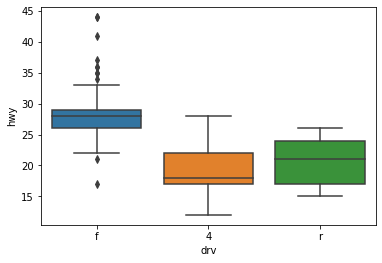

In [ ]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

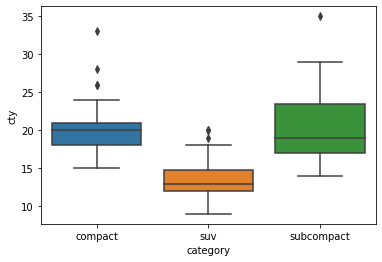

In [ ]:
#실습
df = mpg.query('category in ["compact","subcompact","suv"]')
sns.boxplot(data = df, x = 'category', y = 'cty')